# Data analysis of conflict in Afganisthan(Kabul, Kunduz, Ghazni) over change in climate conditions.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Data is been downloaded from http://ucdp.uu.se/downloads/ged/ged201-xlsx.zip 

In [166]:
%%time
conflict_data = pd.read_excel('/Users/mdeshkar/Documents/Docs/Mandar/kaggle/climat-conflict/ged201.xlsx')

CPU times: user 1min 22s, sys: 363 ms, total: 1min 22s
Wall time: 1min 22s


## General Discriptive statistics and data types of the conflict dataset.

In [168]:
conflict_data.shape

(225385, 49)

In [295]:
conflict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225385 entries, 0 to 225384
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 225385 non-null  int64         
 1   relid              225385 non-null  object        
 2   year               225385 non-null  int64         
 3   active_year        225385 non-null  int64         
 4   code_status        225385 non-null  object        
 5   type_of_violence   225385 non-null  int64         
 6   conflict_dset_id   225385 non-null  int64         
 7   conflict_new_id    225385 non-null  int64         
 8   conflict_name      225385 non-null  object        
 9   dyad_dset_id       225385 non-null  int64         
 10  dyad_new_id        225385 non-null  int64         
 11  dyad_name          225385 non-null  object        
 12  side_a_dset_id     225385 non-null  int64         
 13  side_a_new_id      225385 non-null  int64   

In [170]:
conflict_data.isna().sum()

id                        0
relid                     0
year                      0
active_year               0
code_status               0
type_of_violence          0
conflict_dset_id          0
conflict_new_id           0
conflict_name             0
dyad_dset_id              0
dyad_new_id               0
dyad_name                 0
side_a_dset_id            0
side_a_new_id             0
side_a                    0
side_b_dset_id            0
side_b_new_id             0
side_b                    0
number_of_sources         0
source_article            5
source_office        106398
source_date          106398
source_headline      106398
source_original       39432
where_prec                0
where_coordinates         0
where_description      4245
adm_1                  8995
adm_2                 52276
latitude                  0
longitude                 0
geom_wkt                  0
priogrid_gid              0
country                   0
country_id                0
region              

In [171]:
conflict_data.country.value_counts()

Syria              60779
Afghanistan        33612
India              15684
Iraq                7733
Pakistan            5834
                   ...  
Botswana               1
Solomon Islands        1
Qatar                  1
Malta                  1
Sweden                 1
Name: country, Length: 122, dtype: int64

## Filterning out the data set that is specific to Afghanistan

In [172]:
afg_conflict_data = conflict_data[conflict_data.country == 'Afghanistan']
print(afg_conflict_data.shape)

(33612, 49)


In [173]:
print(afg_conflict_data.adm_2.value_counts())

Kabul district                    992
Nahri Sarraj district (Greshk)    735
Nad Ali district (Marja)          589
Kandahar district                 521
Sangin district                   495
                                 ... 
Warsaj district                     1
Hisa-I-Awal Panjsher district       1
Waras district                      1
Pech district (Manogai)             1
Panjab district                     1
Name: adm_2, Length: 389, dtype: int64


### Dataset for three districts of interest. 

In [174]:
conflict_df = afg_conflict_data[afg_conflict_data.adm_2.isin(['Kabul district','Kunduz district','Ghazni district'])]
print(conflict_df.shape)
print(conflict_df.adm_2.value_counts())

(1541, 49)
Kabul district     992
Kunduz district    299
Ghazni district    250
Name: adm_2, dtype: int64


In [175]:
afg_conflict_df = conflict_df[['id','date_end', 'best', 'adm_2']]
afg_conflict_df.columns = ['id', 'date', 'deaths', 'districts']

## Aggregation
1. Calculating the sum of deaths for each months using 'best' variables from 1989 to 2019. 
2. Calculating the number of incidents for each months from 1989 to 2019

In [229]:
agg_deaths = afg_conflict_df[['date','deaths','districts']].set_index('date').groupby([pd.Grouper(freq='M'),'districts']).sum().reset_index()
agg_events = afg_conflict_df[['date','districts']].set_index('date').groupby([pd.Grouper(freq='M'),'districts']).size().reset_index()

In [230]:
agg_deaths

,date,districts,deaths
0,1989-02-28,Ghazni district,6
1,1989-02-28,Kabul district,30
2,1989-03-31,Kabul district,1
3,1989-04-30,Kabul district,67
4,1989-05-31,Ghazni district,0
...,...,...,...
467,2019-11-30,Kabul district,0
468,2019-11-30,Kunduz district,22
469,2019-12-31,Ghazni district,31
470,2019-12-31,Kabul district,3


In [231]:
agg_events.columns = ['date', 'districts', 'incidents']

In [232]:
agg_events

,date,districts,incidents
0,1989-02-28,Ghazni district,1
1,1989-02-28,Kabul district,7
2,1989-03-31,Kabul district,1
3,1989-04-30,Kabul district,10
4,1989-05-31,Ghazni district,1
...,...,...,...
467,2019-11-30,Kabul district,3
468,2019-11-30,Kunduz district,6
469,2019-12-31,Ghazni district,6
470,2019-12-31,Kabul district,1


In [233]:
deaths_list = [agg_deaths[agg_deaths['districts']=='Kabul district'],
               agg_deaths[agg_deaths['districts']=='Kunduz district'],
               agg_deaths[agg_deaths['districts']=='Ghazni district']]
events_list = [agg_events[agg_events['districts']=='Kabul district'],
               agg_events[agg_events['districts']=='Kunduz district'],
               agg_events[agg_events['districts']=='Ghazni district']]

### Total number of deaths for each month from 1989 - 2019 from three districts namely Kabul, Kunduz and Ghazni

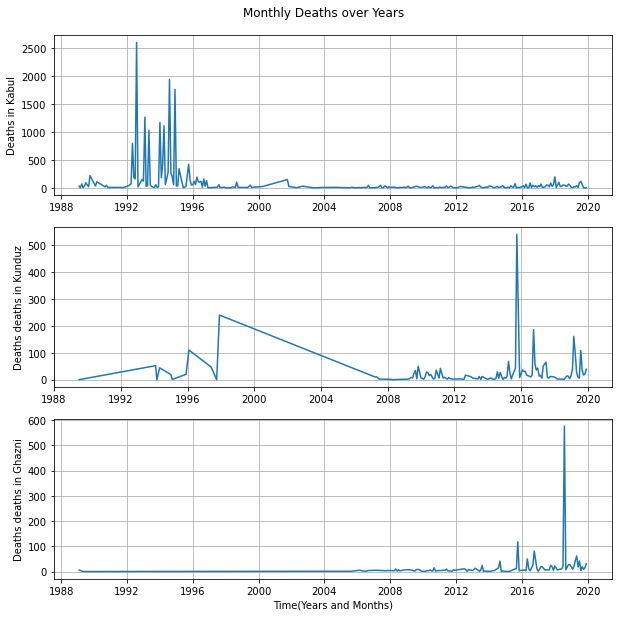

In [306]:
fig, ax = plt.subplots(3,1, figsize=(10,10))
fig.suptitle('Monthly Deaths over Years', y=0.92)
ax[0].plot(deaths_list[0].date, deaths_list[0].deaths)
ax[0].grid()
ax[1].plot(deaths_list[1].date, deaths_list[1].deaths)
ax[1].grid()
ax[2].plot(deaths_list[2].date, deaths_list[2].deaths)
ax[2].grid()
ax[0].set_ylabel('Deaths in Kabul')
ax[1].set_ylabel('Deaths deaths in Kunduz')
ax[2].set_ylabel('Deaths deaths in Ghazni')
ax[2].set_xlabel('Time(Years and Months)')

plt.show()


In [192]:
events_list[0].incidents

1       7
2       1
3      10
5       1
6       6
       ..
458     6
461     4
464     3
467     3
470     1
Name: incidents, Length: 241, dtype: int64

### Following data for Temperature and Precipitation is downloaded from https://power.larc.nasa.gov/data-access-viewer/

In [239]:
kabul_climate = pd.read_csv("/Users/mdeshkar/Documents/Docs/Mandar/kaggle/climat-conflict/kabul.csv",
                           skiprows=14,
                           names=['lat','long','year', 'month','day', 'precipitation', 'min_temp', 'max_temp', 'avg_temp'])

kunduz_climate = pd.read_csv("/Users/mdeshkar/Documents/Docs/Mandar/kaggle/climat-conflict/kunduz.csv",
                           skiprows=14,
                           names=['lat','long','year', 'month','day', 'precipitation', 'min_temp', 'max_temp', 'avg_temp'])

ghazni_climate = pd.read_csv("/Users/mdeshkar/Documents/Docs/Mandar/kaggle/climat-conflict/ghazni.csv",
                           skiprows=14,
                           names=['lat','long','year', 'month','day', 'precipitation', 'min_temp', 'max_temp', 'avg_temp'])


In [240]:
kabul_climate

,lat,long,year,month,day,precipitation,min_temp,max_temp,avg_temp
0,34.55531,69.20751,1989,1,1,0.00,2.57,-6.02,-2.87
1,34.55531,69.20751,1989,1,2,0.11,4.22,-7.08,-2.83
2,34.55531,69.20751,1989,1,3,0.00,3.02,-7.47,-3.13
3,34.55531,69.20751,1989,1,4,1.76,1.72,-6.06,-2.96
4,34.55531,69.20751,1989,1,5,1.82,0.53,-7.89,-3.82
...,...,...,...,...,...,...,...,...,...
11317,34.55531,69.20751,2019,12,27,0.00,11.76,-0.48,3.35
11318,34.55531,69.20751,2019,12,28,0.00,9.84,-1.19,2.11
11319,34.55531,69.20751,2019,12,29,0.00,7.67,-1.15,1.74
11320,34.55531,69.20751,2019,12,30,0.00,7.13,-2.36,1.43


In [241]:
kunduz_climate

,lat,long,year,month,day,precipitation,min_temp,max_temp,avg_temp
0,36.72861,68.86811,1989,1,1,0.02,9.48,1.15,5.05
1,36.72861,68.86811,1989,1,2,0.00,14.02,0.45,5.61
2,36.72861,68.86811,1989,1,3,0.49,12.67,1.66,5.10
3,36.72861,68.86811,1989,1,4,6.29,5.44,-0.53,1.91
4,36.72861,68.86811,1989,1,5,4.82,-0.05,-5.08,-1.73
...,...,...,...,...,...,...,...,...,...
11317,36.72861,68.86811,2019,12,27,0.00,18.12,5.58,10.55
11318,36.72861,68.86811,2019,12,28,0.00,18.58,5.83,10.86
11319,36.72861,68.86811,2019,12,29,0.00,13.77,6.55,9.51
11320,36.72861,68.86811,2019,12,30,0.14,11.29,4.08,6.90


In [242]:
ghazni_climate

,lat,long,year,month,day,precipitation,min_temp,max_temp,avg_temp
0,33.54511,68.41741,1989,1,1,0.00,0.13,-9.76,-5.27
1,33.54511,68.41741,1989,1,2,0.11,2.50,-10.06,-5.04
2,33.54511,68.41741,1989,1,3,0.00,1.82,-10.99,-4.88
3,33.54511,68.41741,1989,1,4,1.57,0.35,-7.82,-3.93
4,33.54511,68.41741,1989,1,5,1.66,-1.35,-11.51,-6.51
...,...,...,...,...,...,...,...,...,...
11317,33.54511,68.41741,2019,12,27,0.00,7.91,-5.98,-1.32
11318,33.54511,68.41741,2019,12,28,0.00,6.50,-8.14,-2.41
11319,33.54511,68.41741,2019,12,29,0.00,4.98,-8.26,-2.89
11320,33.54511,68.41741,2019,12,30,0.00,3.83,-7.92,-3.21


### Calculating the total monthly change in precipitaion for three distircts from 1989-2019

In [307]:
agg_kabul_prec = kabul_climate[['year','month','precipitation']].groupby(['year','month']).sum().reset_index()
agg_kunduz_prec = kunduz_climate[['year','month','precipitation']].groupby(['year','month']).sum().reset_index()
agg_ghazni_prec = ghazni_climate[['year','month','precipitation']].groupby(['year','month']).sum().reset_index()

In [308]:
agg_kabul_prec['date'] = pd.to_datetime(agg_kabul_prec[['year', 'month']].assign(day=1))
agg_kunduz_prec['date'] = pd.to_datetime(agg_kunduz_prec[['year', 'month']].assign(day=1))
agg_ghazni_prec['date'] = pd.to_datetime(agg_ghazni_prec[['year', 'month']].assign(day=1))

In [309]:
agg_kabul_prec.sort_values('date',inplace=True)
agg_kunduz_prec.sort_values('date',inplace=True)
agg_ghazni_prec.sort_values('date',inplace=True)

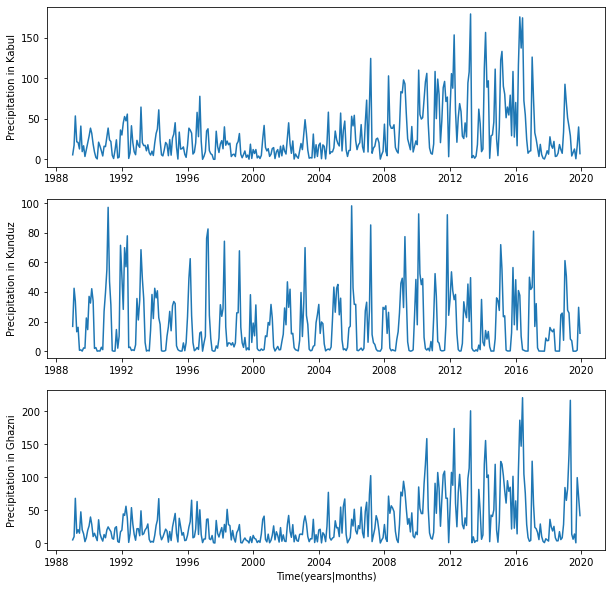

In [310]:
fig, ax = plt.subplots(3,1, figsize=(10,10))
ax[0].plot(agg_kabul_prec.date, agg_kabul_prec.precipitation)
ax[1].plot(agg_kunduz_prec.date, agg_kunduz_prec.precipitation)
ax[2].plot(agg_ghazni_prec.date, agg_ghazni_prec.precipitation)
ax[0].set_ylabel('Precipitation in Kabul')
ax[1].set_ylabel('Precipitation in Kunduz')
ax[2].set_ylabel('Precipitation in Ghazni')
ax[2].set_xlabel('Time(years|months)')
plt.show()


### Calculating the total monthly change in avg temperature in three districts from 1989-2019

In [311]:
agg_kabul_temp = kabul_climate[['year','month','avg_temp']].groupby(['year','month']).sum().reset_index()
agg_kunduz_temp = kunduz_climate[['year','month','avg_temp']].groupby(['year','month']).sum().reset_index()
agg_ghazni_temp = ghazni_climate[['year','month','avg_temp']].groupby(['year','month']).sum().reset_index()

In [312]:
agg_kabul_temp['date'] = pd.to_datetime(agg_kabul_temp[['year', 'month']].assign(day=1))
agg_kunduz_temp['date'] = pd.to_datetime(agg_kunduz_temp[['year', 'month']].assign(day=1))
agg_ghazni_temp['date'] = pd.to_datetime(agg_ghazni_temp[['year', 'month']].assign(day=1))

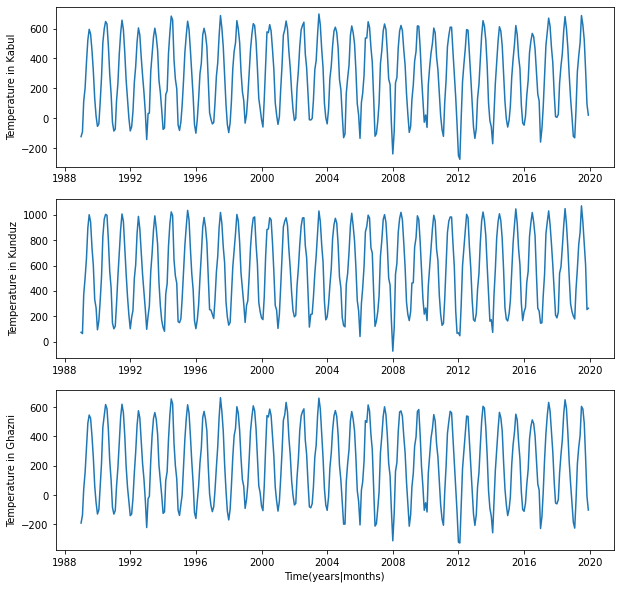

In [313]:
fig, ax = plt.subplots(3,1, figsize=(10,10))
ax[0].plot(agg_kabul_temp.date, agg_kabul_temp.avg_temp)
ax[1].plot(agg_kunduz_temp.date, agg_kunduz_temp.avg_temp)
ax[2].plot(agg_ghazni_temp.date, agg_ghazni_temp.avg_temp)
ax[0].set_ylabel('Temperature in Kabul')
ax[1].set_ylabel('Temperature in Kunduz')
ax[2].set_ylabel('Temperature in Ghazni')
ax[2].set_xlabel('Time(years|months)')
plt.show()


In [314]:
for i in [0,1,2]:
    deaths_list[i]['date'] = deaths_list[i]['date'].apply(lambda dt: dt.replace(day=1))
    events_list[i]['date'] = events_list[i]['date'].apply(lambda dt: dt.replace(day=1))

<ipython-input-314-6bba608356b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths_list[i]['date'] = deaths_list[i]['date'].apply(lambda dt: dt.replace(day=1))
<ipython-input-314-6bba608356b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_list[i]['date'] = events_list[i]['date'].apply(lambda dt: dt.replace(day=1))


### Joining Climate and Conflict datasets

In [315]:
kabul_conflict_climate_df = deaths_list[0].merge(agg_kabul_temp,how='left',
                                                 left_on='date',
                                                 right_on='date').merge(agg_kabul_prec,
                                                                       how = 'left',
                                                                       left_on='date',
                                                                       right_on = 'date')[['date','districts','deaths','avg_temp','precipitation']]

kunduz_conflict_climate_df = deaths_list[1].merge(agg_kunduz_temp,how='left',
                                                 left_on='date',
                                                 right_on='date').merge(agg_kunduz_prec,
                                                                       how = 'left',
                                                                       left_on='date',
                                                                       right_on = 'date')[['date','districts','deaths','avg_temp','precipitation']]

ghazni_conflict_climate_df = deaths_list[2].merge(agg_ghazni_temp,how='left',
                                                 left_on='date',
                                                 right_on='date').merge(agg_ghazni_prec,
                                                                       how = 'left',
                                                                       left_on='date',
                                                                       right_on = 'date')[['date','districts','deaths','avg_temp','precipitation']]
conflict_climate_df = pd.concat([kabul_conflict_climate_df, kunduz_conflict_climate_df,ghazni_conflict_climate_df])

In [316]:
conflict_climate_df

,date,districts,deaths,avg_temp,precipitation
0,1989-02-01,Kabul district,30,-91.91,17.38
1,1989-03-01,Kabul district,1,113.35,53.52
2,1989-04-01,Kabul district,67,202.11,21.68
3,1989-05-01,Kabul district,3,371.62,20.92
4,1989-06-01,Kabul district,32,523.43,12.89
...,...,...,...,...,...
111,2019-08-01,Ghazni district,4,588.01,13.72
112,2019-09-01,Ghazni district,19,489.92,0.34
113,2019-10-01,Ghazni district,9,256.98,99.34
114,2019-11-01,Ghazni district,15,-10.52,69.41


### Correlation between deaths and temperature and precipitation

In [325]:
print("Correlation between deaths and change in temperature :",conflict_climate_df['deaths'].corr(conflict_climate_df['avg_temp']))
print("Correlation between deaths and change in precipitation :",conflict_climate_df['deaths'].corr(conflict_climate_df['precipitation']) )

Correlation between deaths and change in temperature : -0.019204860501475067
Correlation between deaths and change in precipitation : -0.05328482449931266


* The number from one-one correlation does not give us any significant evidence of relationship between conflict and climate features. 
* Moreover, we will try to find out if some of climate variable gives us any evidence for establishing relation ship. 

### Implementing linear regression model to find out over all effect of climate features in the number of monthly deaths caused by voilent incidents in the three districts of Afghanistan.

1. * H0: there is no significant effect of climate variables on # of deaths.
   * H1: there is significant effect of climate variables on # of deaths.
2. We will use t-statistics from the linear model to identify the mean effect on deaths (dependent variable) caused by 
   change in temperature and precipitation.
3. If the p-value with respect to independent variables is less than 0.05 then we reject H0, other wise we fails to reject H0. 
4. * R-squared value gives us an over all impact of the combination of independent features on dependent variable. 
   * R^2 close to 1 is the storng evidence for the relation ship  between dependent and independent features. 

In [326]:
conflict_climate_df = sm.add_constant(conflict_climate_df)
results = sm.OLS(conflict_climate_df['deaths'], conflict_climate_df[['const','avg_temp','precipitation']]).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deaths   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9893
Date:                Sat, 10 Jul 2021   Prob (F-statistic):              0.373
Time:                        16:47:55   Log-Likelihood:                -3187.0
No. Observations:                 472   AIC:                             6380.
Df Residuals:                     469   BIC:                             6393.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            75.9149     19.555      3.882      0.000      37.489     114.341
avg_temp         -0.0270      0.034     -0.801      0.424      -0.093       0.039
precipitation    -0.3468      0.258     -1.343      0.180      -0.854       0.160
==============================================================================
Omnibus:                      704.308   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123462.555
Skew:                           8.177   Prob(JB):                         0.00
Kurtosis:                      80.526   Cond. No.                         953.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* P-value associated with the t-statistics of avg-temperature and precipitation is greater than 0.05.
* Therefore we accept H0 for both independent features.
* We conclude that there is no significant relation ship bettween conflict and climate give the above variables. 
* We would probably need more information to establish this relationship. 